In [35]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from datetime import datetime
from pytz import timezone
import pytz
from library.sb_utils import save_file

ModuleNotFoundError: No module named 'library'

In [36]:
solar_prediction = pd.read_csv('SolarPrediction.csv')

In [37]:
solar_prediction.info

<bound method DataFrame.info of          UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  Wind

In [38]:
solar_prediction.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


looking for null in the data

In [39]:
missing = pd.concat([solar_prediction.isnull().sum(), 100 * solar_prediction.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
UNIXTime,0,0.0
Data,0,0.0
Time,0,0.0
Radiation,0,0.0
Temperature,0,0.0
Pressure,0,0.0
Humidity,0,0.0
WindDirection(Degrees),0,0.0
Speed,0,0.0
TimeSunRise,0,0.0


In [40]:
solar_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [41]:
solar_prediction.head(4000)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
3995,1473926407,9/14/2016 12:00:00 AM,22:00:07,1.22,51,30.46,100,80.01,1.12,06:10:00,18:26:00
3996,1473926106,9/14/2016 12:00:00 AM,21:55:06,1.25,51,30.46,99,57.01,2.25,06:10:00,18:26:00
3997,1473925807,9/14/2016 12:00:00 AM,21:50:07,1.24,51,30.46,99,67.40,1.12,06:10:00,18:26:00
3998,1473925508,9/14/2016 12:00:00 AM,21:45:08,1.27,52,30.46,99,40.52,1.12,06:10:00,18:26:00


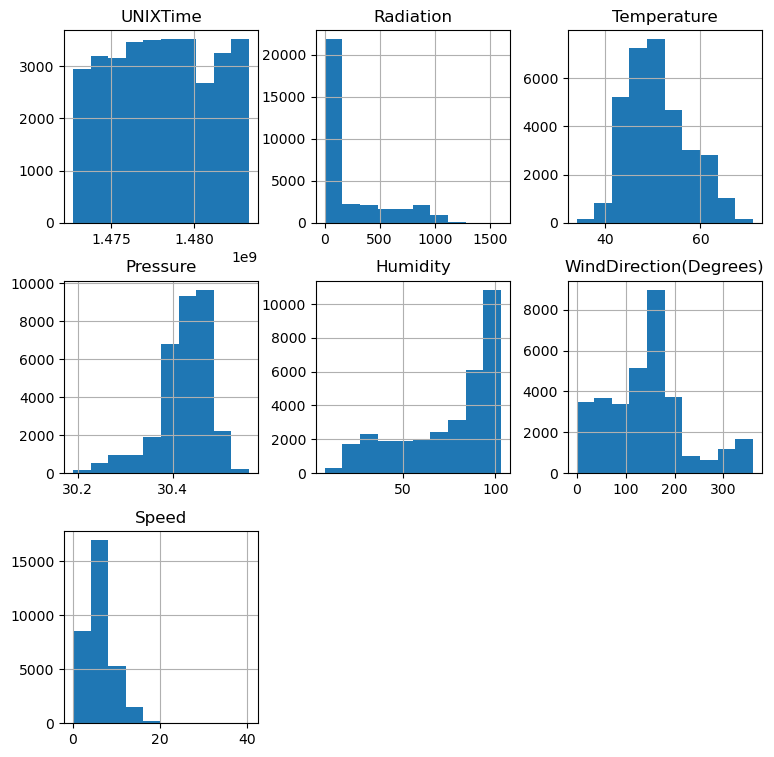

In [42]:
solar_prediction.hist(figsize=[9,9])
plt.show()

looking on pairwise corrolation between radiation to other values

In [43]:
solar_prediction.corr()["Radiation"].sort_values(ascending = False)

Radiation                 1.000000
Temperature               0.734955
Pressure                  0.119016
Speed                     0.073627
UNIXTime                 -0.081286
Humidity                 -0.226171
WindDirection(Degrees)   -0.230324
Name: Radiation, dtype: float64

Searching for out of the ordinery data

<AxesSubplot:xlabel='Time', ylabel='Radiation'>

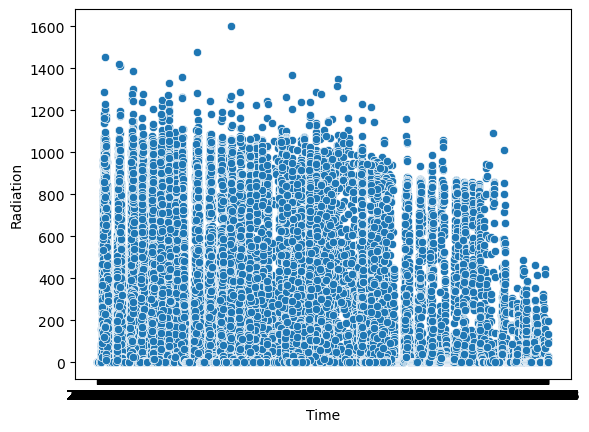

In [91]:
sns.scatterplot(data=solar_prediction, x="Time", y='Radiation')

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

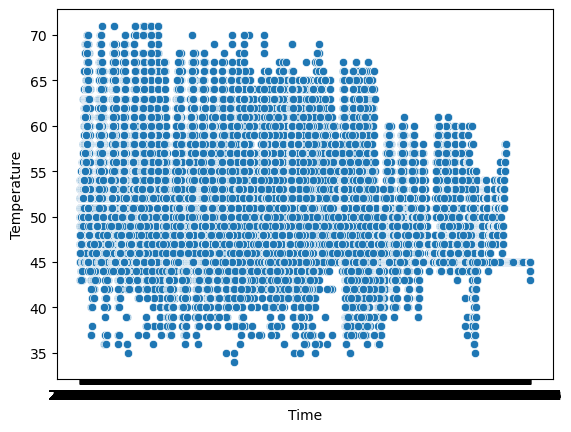

In [86]:
sns.scatterplot(data=solar_prediction, x="Time", y='Temperature')


<AxesSubplot:xlabel='Time', ylabel='Humidity'>

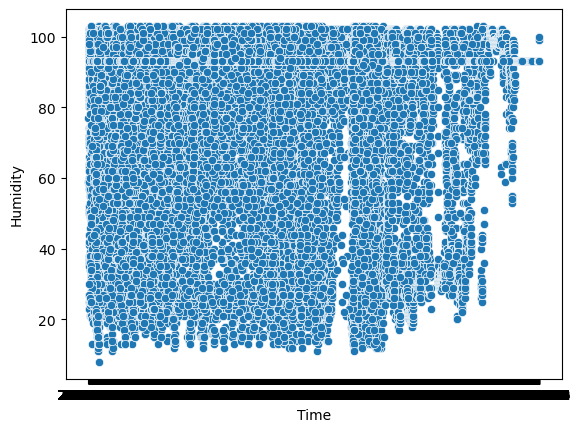

In [87]:
sns.scatterplot(data=solar_prediction, x="Time", y='Humidity')

In [92]:
solar_prediction.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Total_time
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,306.110965,43.871015,11.557425,10.526066,11.347886
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,34.781367,4.963061,6.912034,1.096691,0.476307
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,245.000000,35.000000,0.000000,9.000000,11.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,277.000000,40.000000,6.000000,10.000000,11.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,306.000000,44.000000,12.000000,11.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,334.000000,48.000000,18.000000,11.000000,12.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,366.000000,52.000000,23.000000,12.000000,12.000000


looking more closely on radiation data

In [45]:
hawaii= timezone('Pacific/Honolulu')
solar_prediction.index =  pd.to_datetime(solar_prediction['UNIXTime'], unit='s')
solar_prediction.index = solar_prediction.index.tz_localize(pytz.utc).tz_convert(hawaii)
solar_prediction['MonthOfYear'] = solar_prediction.index.strftime('%m').astype(int)
solar_prediction['DayOfYear'] = solar_prediction.index.strftime('%j').astype(int)
solar_prediction['WeekOfYear'] = solar_prediction.index.strftime('%U').astype(int)
solar_prediction['Hour'] = solar_prediction.index.hour
solar_prediction['Month'] = solar_prediction.index.month
solar_prediction['Date'] = solar_prediction.index.date

solar_prediction['TimeSunRise'] = pd.to_datetime(solar_prediction['TimeSunRise'], format='%H:%M:%S').dt.time
solar_prediction['TimeSunSet'] = pd.to_datetime(solar_prediction['TimeSunSet'], format='%H:%M:%S').dt.time
solar_prediction['Total_time'] = pd.to_datetime(solar_prediction['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(solar_prediction['TimeSunRise'], format='%H:%M:%S').dt.hour

TypeError: 'DataFrame' object is not callable

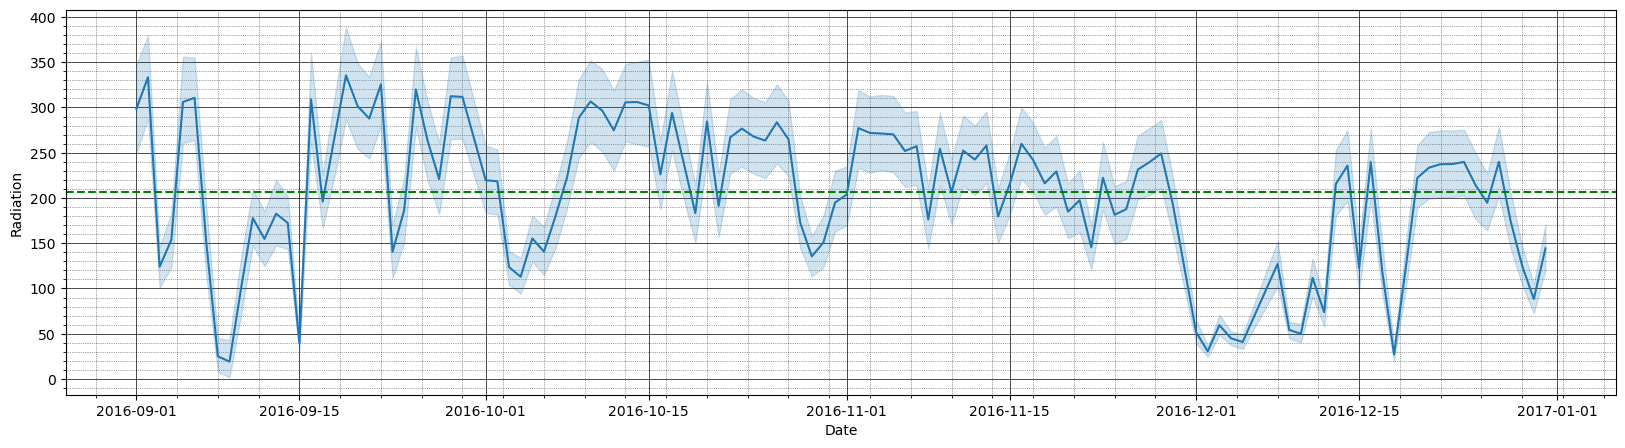

In [49]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=solar_prediction, x="Date", y="Radiation")

mean_avg=solar_prediction['Radiation'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([solar_prediction(2016,9,1), datetime(2017,1,1)])

ax.legend();

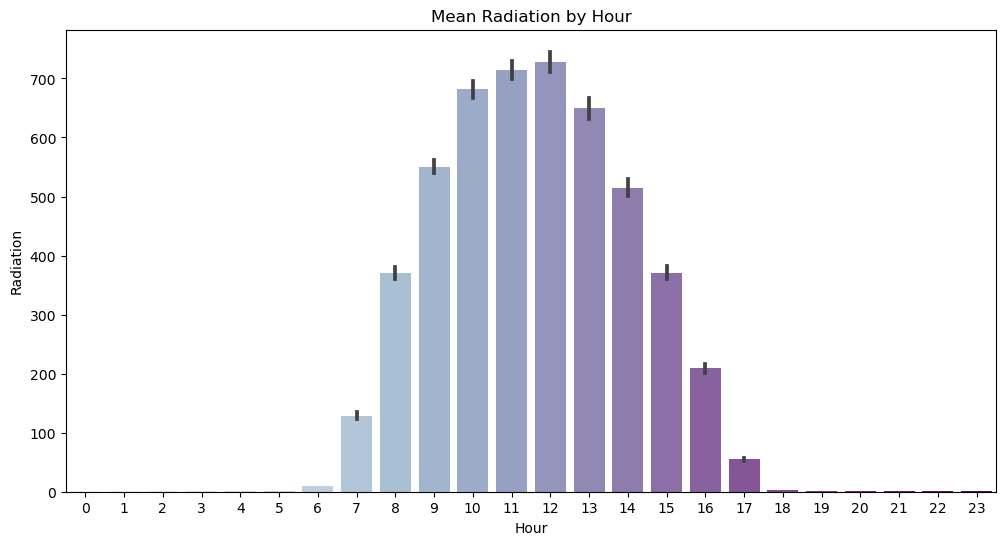

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Hour", y='Radiation', data=solar_prediction, palette="BuPu")
ax.set_title('Mean Radiation by Hour');

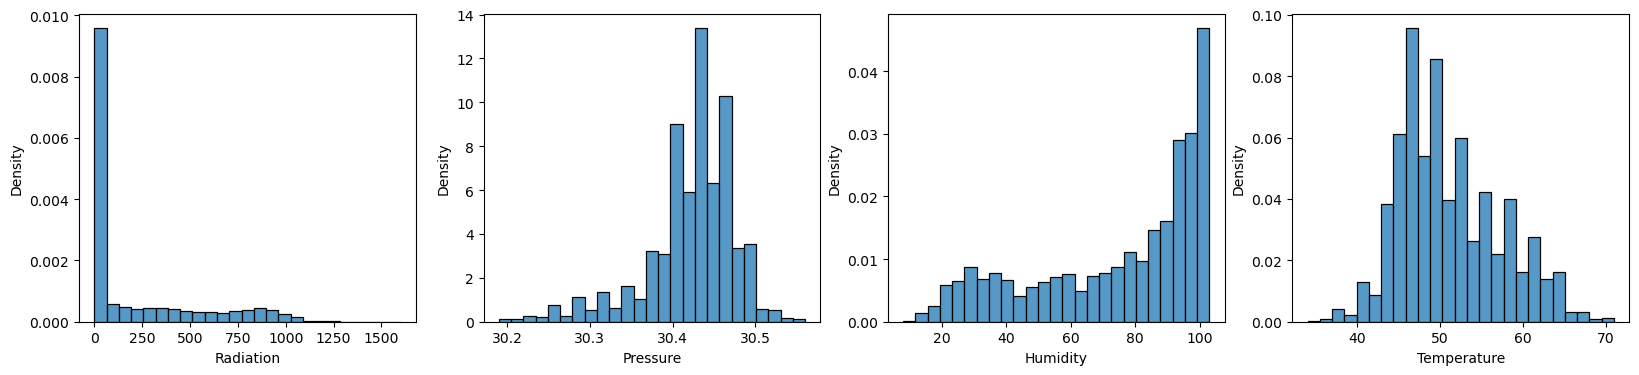

In [57]:
f, ax = plt.subplots(1,4,figsize=(20,4))
sns.histplot(solar_prediction['Radiation'], stat="density", bins=25, ax=ax[0])
sns.histplot(solar_prediction['Pressure'], stat="density", bins=25, ax=ax[1])
sns.histplot(solar_prediction['Humidity'], stat="density", bins=25, ax=ax[2])
sns.histplot(solar_prediction['Temperature'], stat="density", bins=25, ax=ax[3]);

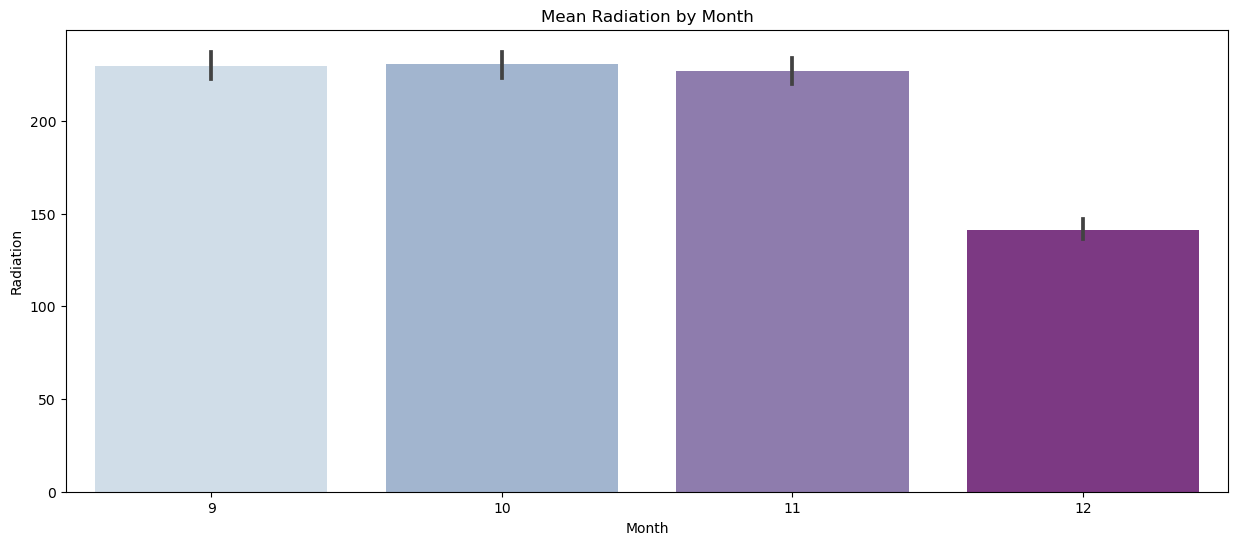

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Month", y='Radiation', data=solar_prediction, palette="BuPu", order=[9,10,11,12])
ax.set_title('Mean Radiation by Month');

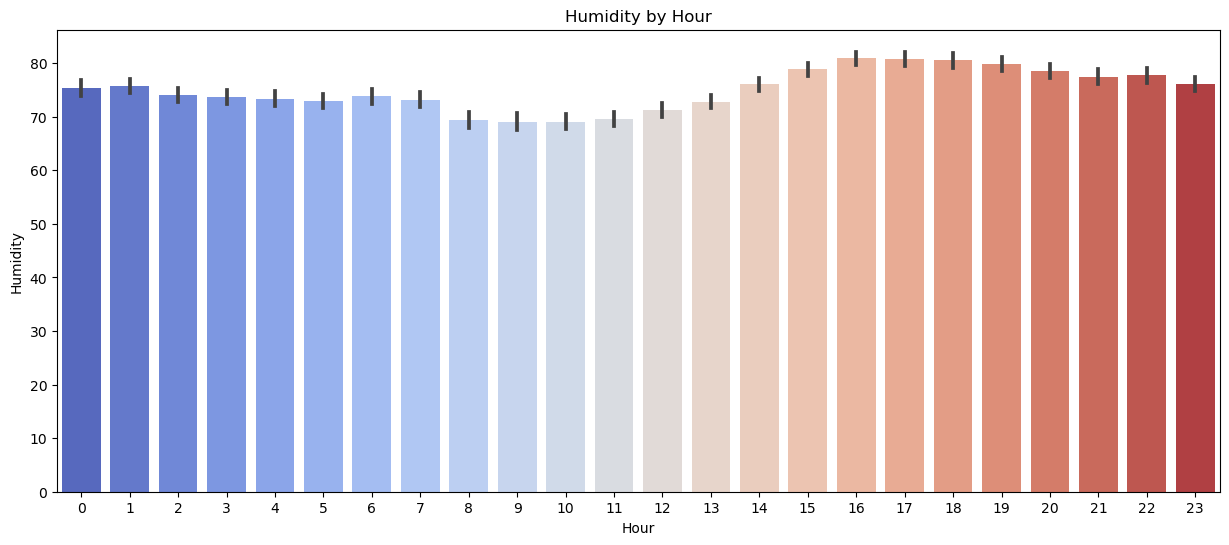

In [65]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Hour", y='Humidity', data=solar_prediction, palette=("coolwarm"))
ax.set_title('Humidity by Hour');

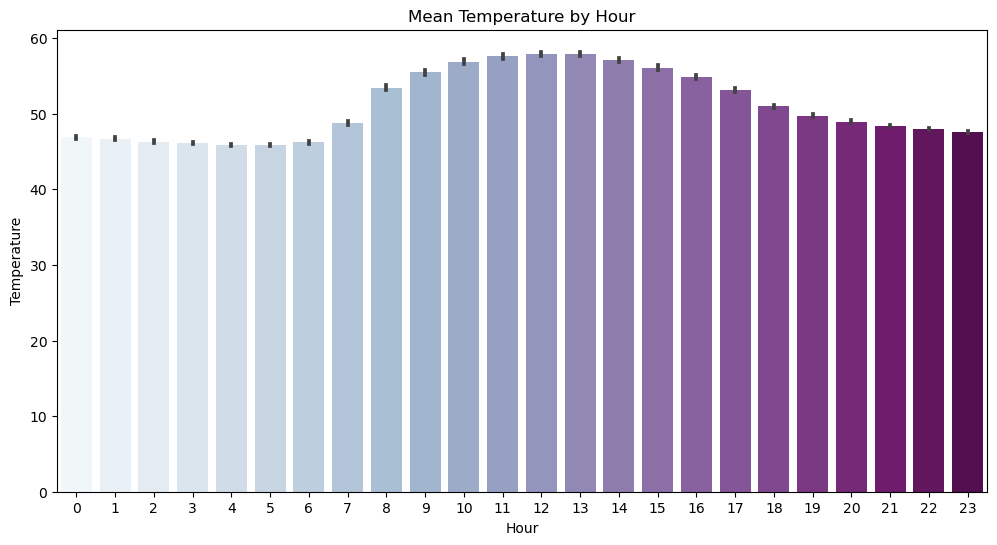

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Hour", y='Temperature', data=solar_prediction, palette="BuPu")
ax.set_title('Mean Temperature by Hour');

looking for eye corrolation 

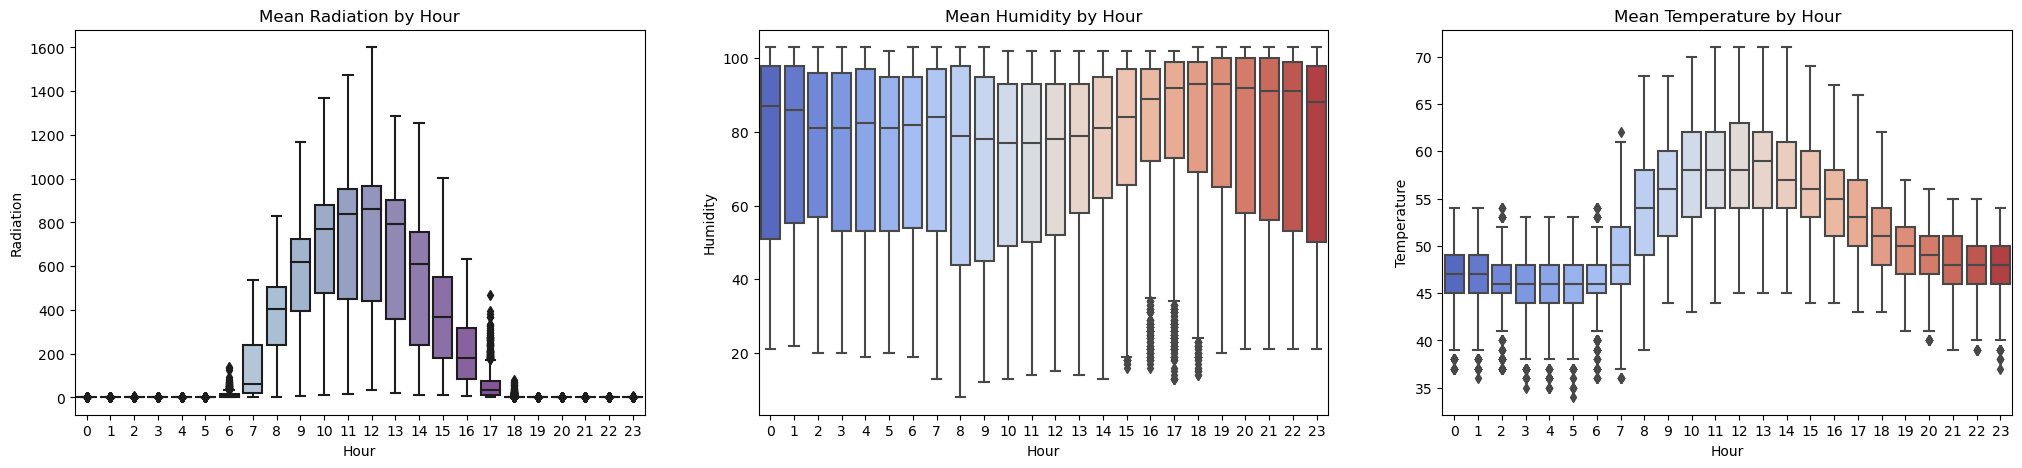

In [107]:
f, axes = plt.subplots(1, 3,figsize=(25,5))
sns.boxplot(x="Hour", y='Radiation', data=solar_prediction, palette="BuPu",ax=axes[0],).set_title('Mean Radiation by Hour')
sns.boxplot(x="Hour", y='Humidity', data=solar_prediction, palette=("coolwarm"),ax=axes[1]).set_title('Mean Humidity by Hour')
sns.boxplot(x="Hour", y='Temperature', data=solar_prediction, palette=("coolwarm"),ax=axes[2]).set_title('Mean Temperature by Hour')
fig.tight_layout()
plt.show()

C:\Users\moren\AppData\Local\Temp\ipykernel_24416\369554609.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f");


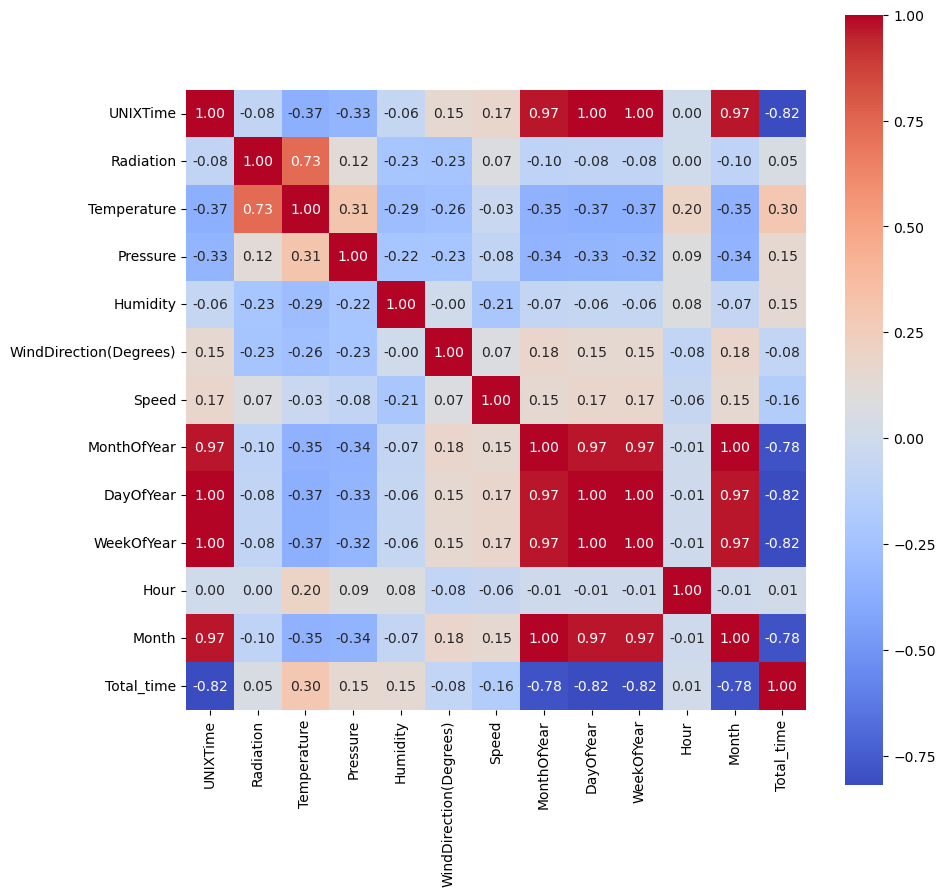

In [101]:
corr = solar_prediction.corr(method = "pearson")
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f");

In [103]:
solar_prediction.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month',
       'Date', 'Total_time'],
      dtype='object')

training Models to predict solar radiation based on the columns above

In [163]:
X = solar_prediction[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
             'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Total_time']]
Y = solar_prediction['Radiation']

In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [165]:
lr = LinearRegression()

#Training the linear regression model
lr.fit(X_train, Y_train)

#Carrying out prediction with the linear model
lr_predict_train = lr.predict(X_train)
lr_predict_test = lr.predict(X_test)

In [166]:
#Checking the performance of the linear model

#Squared error
print('Linear model, R^2 training set:{:.2f}'.format(r2_score(Y_train, lr_predict_train)))
print('Linear model, R^2 test set:{:.2f}'.format(r2_score(Y_test,lr_predict_test)))

#Mean squared error (MSE)
print('Linear model, MSE training set:{:.2f}'.format(mean_squared_error(Y_train, lr_predict_train)))
print('Linear model, MSE test set:{:.2f}'.format(mean_squared_error(Y_test,lr_predict_test)))

Linear model, R^2 training set:0.61
Linear model, R^2 test set:0.59
Linear model, MSE training set:39312.84
Linear model, MSE test set:40445.61


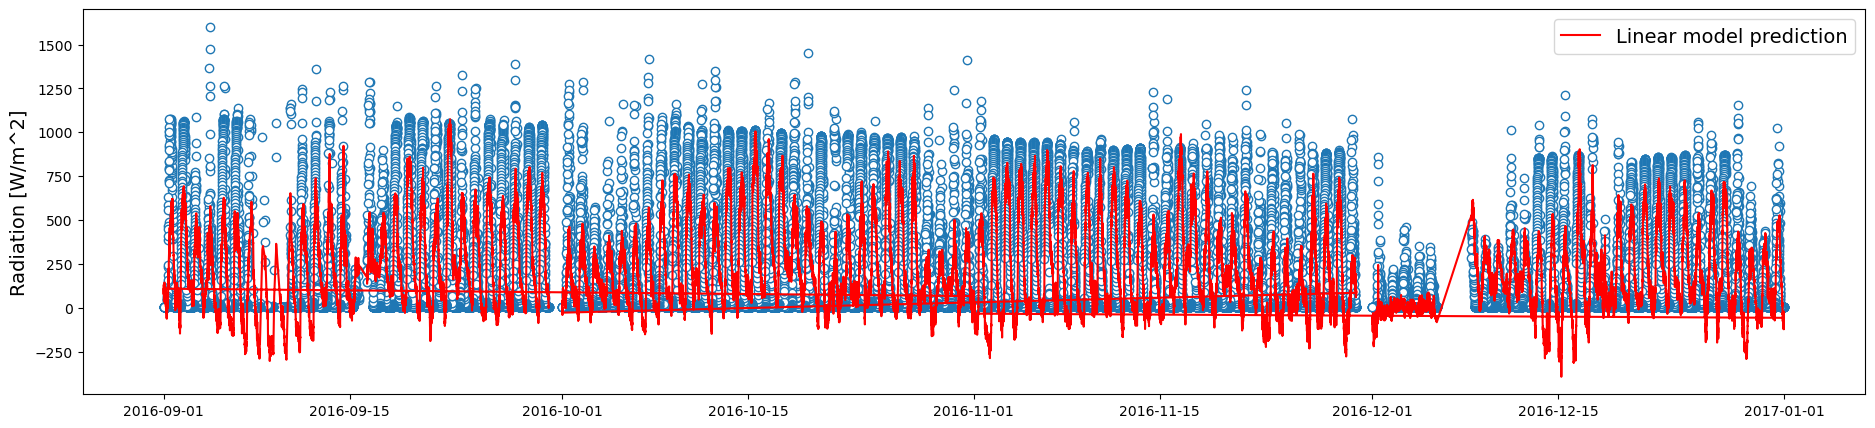

In [167]:
#Carrying out predictions with linear model for the all period
X_F = X.loc[:,:]
y_F_lr = lr.predict(X_F)


fig, ax = plt.subplots(figsize = (23,5))

ax.plot(solar_prediction.Radiation,'o', markerfacecolor='w')
ax.plot(solar_prediction.index, y_F_lr, linewidth = 1.5, color = 'red', label = 'Linear model prediction')
ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()

In [168]:
solar_prediction_5 = solar_prediction.loc['2016-10-03':'2016-10-08',:]

C:\Users\moren\AppData\Local\Temp\ipykernel_24416\2276544230.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  solar_prediction_5 = solar_prediction.loc['2016-10-03':'2016-10-08',:]


C:\Users\moren\AppData\Local\Temp\ipykernel_24416\4271516552.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_five = X.loc['2016-10-03':'2016-10-08',:]


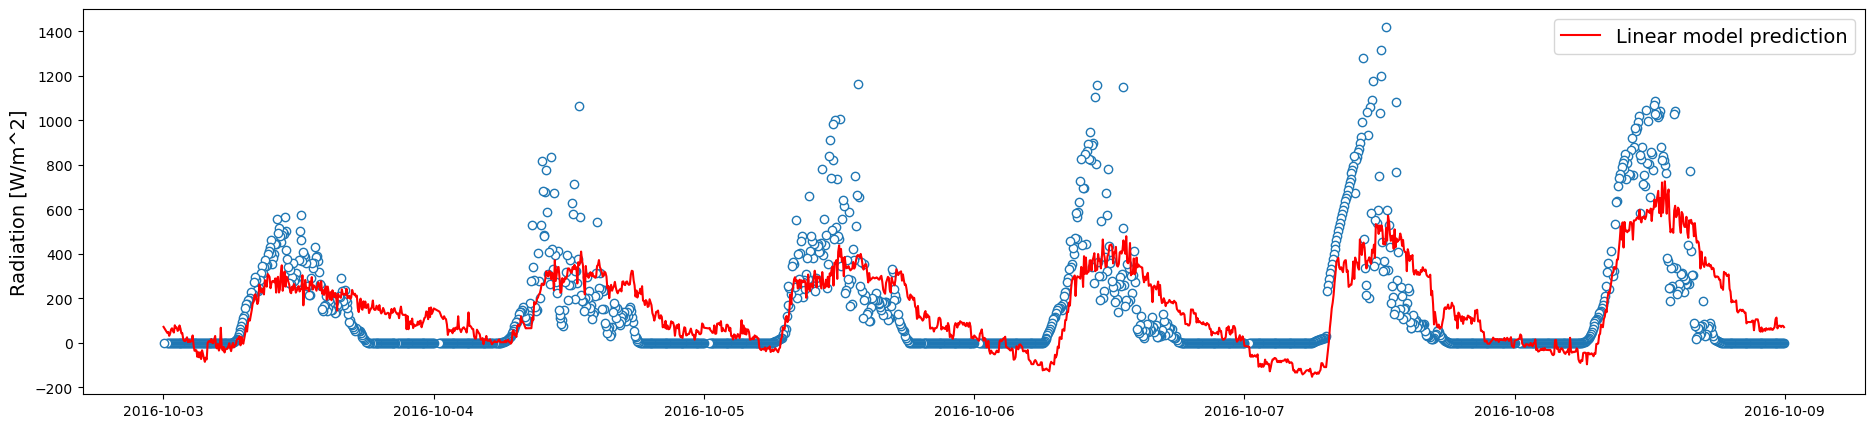

In [169]:
#Carrying out predictions with linear model for the 5-day period
X_five = X.loc['2016-10-03':'2016-10-08',:]
y_five_lr = lr.predict(X_five)


fig, ax = plt.subplots(figsize = (23,5))

ax.plot(solar_prediction_5.Radiation,'o', markerfacecolor='w')
ax.plot(solar_prediction_5.index, y_five_lr, linewidth = 1.5, color = 'red', label = 'Linear model prediction')
ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()

In [172]:
# Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

#Define the grid of hyperparameters
params_rf = {
    'n_estimators': [500, 600, 700],
    'max_depth': [5, 6, 7],
    'min_samples_leaf': [0.075, 0.05, 0.025],
    'max_features': ['log2', 'sqrt']   
}


#Initiate Grid search
grid_rf = GridSearchCV(estimator = rf_model,
                       param_grid = params_rf,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

In [173]:
grid_rf.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.075, 0.05, 0.025],
                         'n_estimators': [500, 600, 700]},
             scoring='neg_mean_squared_error', verbose=1)

In [174]:
rf_best_hyperparams = grid_rf.best_params_
print('Best hyperparameters for RF: \n', rf_best_hyperparams)

Best hyperparameters for RF: 
 {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 0.025, 'n_estimators': 600}


In [175]:
rf = grid_rf.best_estimator_

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
rf_MSE_CV = -cross_val_score(rf, X_train, Y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [178]:
rf_predict_train = rf.predict(X_train)
rf_predict_test = rf.predict(X_test)

In [179]:
print('CV MSE for RF:{:.2f}'.format(rf_MSE_CV.mean()))
print('Train MSE for RF:{:.2f}'.format(mean_squared_error(Y_train,rf_predict_train)))
print('Test MSE for RF:{:.2f}'.format(mean_squared_error(Y_test,rf_predict_test)))

CV MSE for RF:35295.42
Train MSE for RF:34996.37
Test MSE for RF:35827.54


In [180]:
print('Random Forest, R^2 score training set:{:.2f}'.format(r2_score(Y_train, rf_predict_train)))
print('Random Forest, R^2 score test set:{:.2f}'.format(r2_score(Y_test,rf_predict_test)))

Random Forest, R^2 score training set:0.65
Random Forest, R^2 score test set:0.64


C:\Users\moren\AppData\Local\Temp\ipykernel_24416\864754974.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_five = X.loc['2016-10-03':'2016-10-08',:]


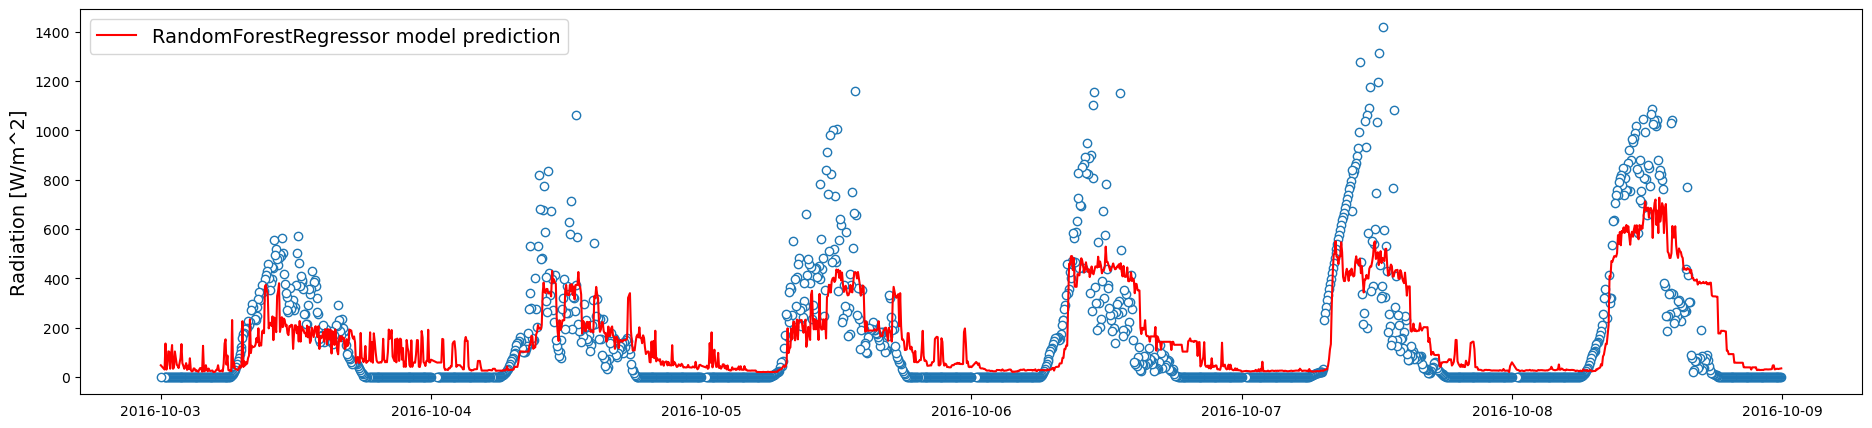

In [195]:
X_five = X.loc['2016-10-03':'2016-10-08',:]
y_five_lr = rf.predict(X_five)


fig, ax = plt.subplots(figsize = (23,5))

ax.plot(solar_prediction_5.Radiation,'o', markerfacecolor='w')
ax.plot(solar_prediction_5.index, y_five_lr, linewidth = 1.5, color = 'red', label = 'RandomForestRegressor model prediction')
ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

In [182]:
#Initiating Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state = 42)

#Define the grid of hyperparameters
params_gb = {
    'n_estimators': [200, 300, 600],
    'max_depth': [2, 3,5],
    'min_samples_leaf': [0.125, 0.1, 0.075],
    'max_features': ['log2', 'sqrt']   
}


#Initiate Grid search
grid_gb = GridSearchCV(estimator = gb_model,
                       param_grid = params_gb,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

In [183]:
grid_gb.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.125, 0.1, 0.075],
                         'n_estimators': [200, 300, 600]},
             scoring='neg_mean_squared_error', verbose=1)

In [184]:
#Extracting best hyperparameters
gb_best_hyperparams = grid_gb.best_params_
print('Best hyperparameters for GB: \n', gb_best_hyperparams)

Best hyperparameters for GB: 
 {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.075, 'n_estimators': 600}


In [185]:
#Extracting best gb model
gb = grid_gb.best_estimator_

In [186]:
gb_MSE_CV = -cross_val_score(gb, X_train, Y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [187]:
gb_predict_train = gb.predict(X_train)
gb_predict_test = gb.predict(X_test)

In [188]:
print('CV MSE for GB:{:.2f}'.format(gb_MSE_CV.mean()))
print('Train MSE for GB:{:.2f}'.format(mean_squared_error(Y_train,gb_predict_train)))
print('Test MSE for GB:{:.2f}'.format(mean_squared_error(Y_test,gb_predict_test)))

CV MSE for GB:22373.20
Train MSE for GB:21347.49
Test MSE for GB:22817.60


In [189]:
print('Gradient Boosting, R^2 score training set:{:.2f}'.format(r2_score(Y_train, gb_predict_train)))
print('Gradient Boosting, R^2 score test set:{:.2f}'.format(r2_score(Y_test,gb_predict_test)))

Gradient Boosting, R^2 score training set:0.79
Gradient Boosting, R^2 score test set:0.77


C:\Users\moren\AppData\Local\Temp\ipykernel_24416\582937345.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_five = X.loc['2016-10-03':'2016-10-08',:]


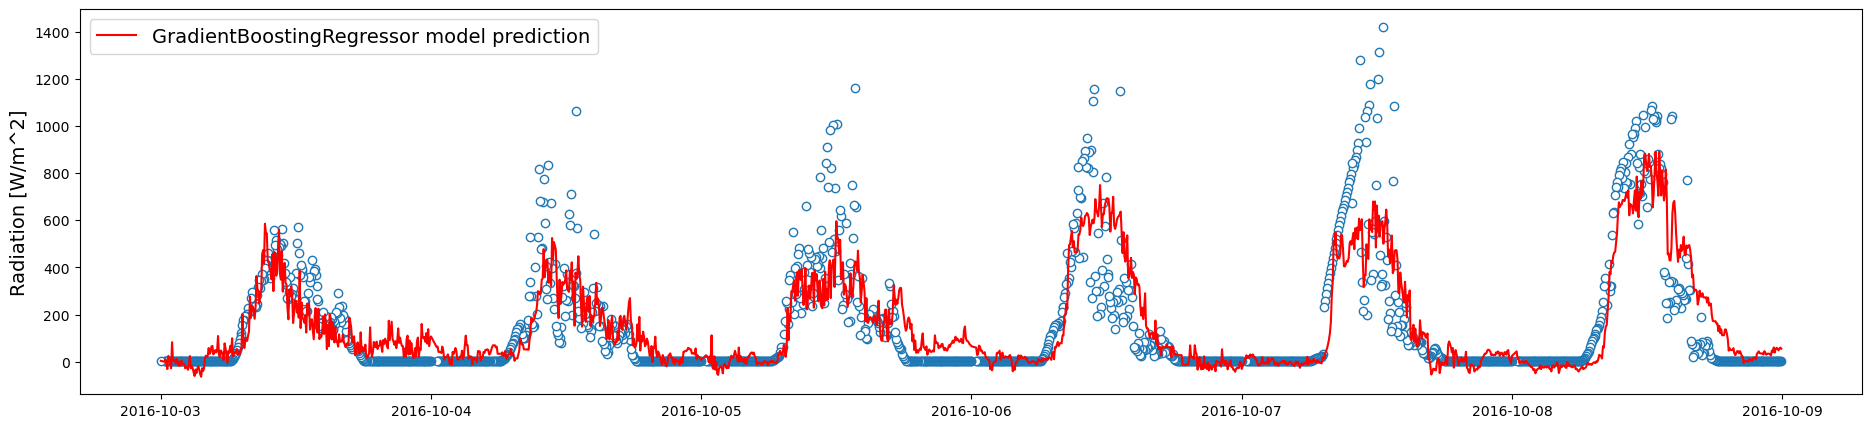

In [194]:
X_five = X.loc['2016-10-03':'2016-10-08',:]
y_five_lr = gb.predict(X_five)


fig, ax = plt.subplots(figsize = (23,5))

ax.plot(solar_prediction_5.Radiation,'o', markerfacecolor='w')
ax.plot(solar_prediction_5.index, y_five_lr, linewidth = 1.5, color = 'red', label = 'GradientBoostingRegressor model prediction')
ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()

In [190]:
regr = RandomForestRegressor(max_depth=25, random_state=3)
regr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=25, random_state=3)

In [191]:
regr.score(X_train, Y_train)

0.982622427973359

In [192]:
regr.score(X_test,Y_test)

0.8797201809133337

C:\Users\moren\AppData\Local\Temp\ipykernel_24416\2058498678.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_five = X.loc['2016-10-03':'2016-10-08',:]


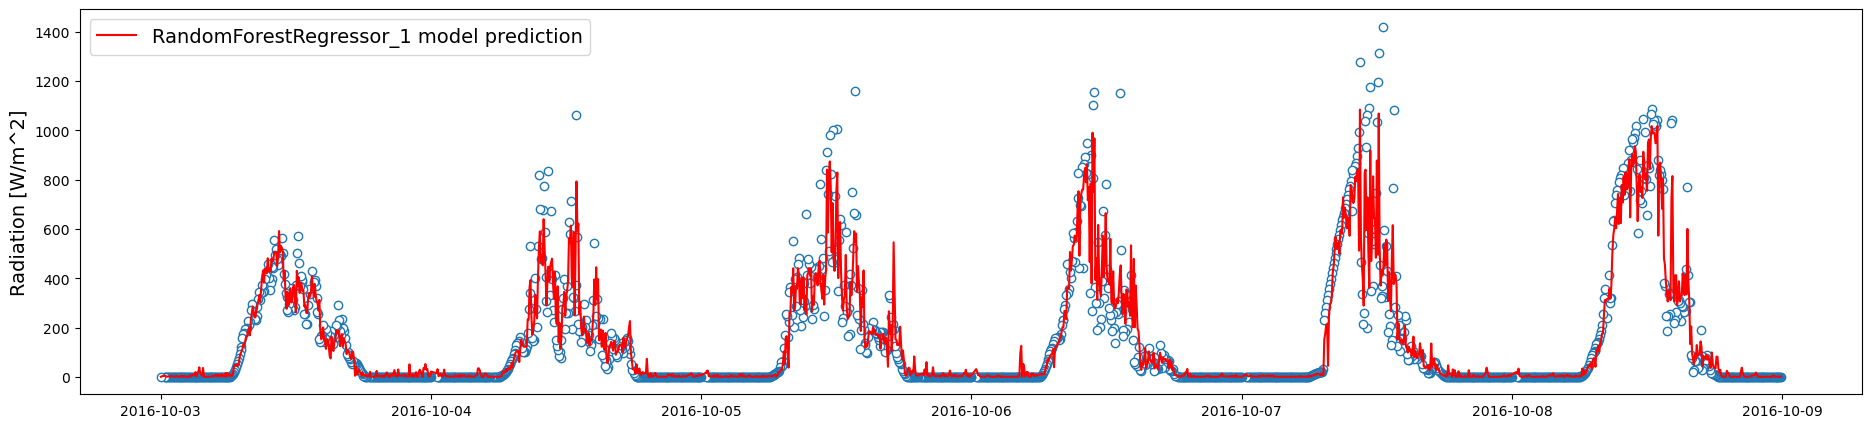

In [197]:
X_five = X.loc['2016-10-03':'2016-10-08',:]
y_five_lr = regr.predict(X_five)


fig, ax = plt.subplots(figsize = (23,5))

ax.plot(solar_prediction_5.Radiation,'o', markerfacecolor='w')
ax.plot(solar_prediction_5.index, y_five_lr, linewidth = 1.5, color = 'red', label = 'RandomForestRegressor_1 model prediction')
ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()